In [20]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
wine = load_wine() #读取红酒数据集

In [22]:
wine.data.shape

(178, 13)

In [23]:
# pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [24]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf_model = clf.fit(Xtrain,Ytrain)
rfc_model = rfc.fit(Xtrain,Ytrain)
score_clf = clf_model.score(Xtest,Ytest)
score_rfc = rfc_model.score(Xtest,Ytest)
print("single tree:{}".format(score_clf),"random forest:{}".format(score_rfc))


single tree:0.9259259259259259 random forest:0.9814814814814815


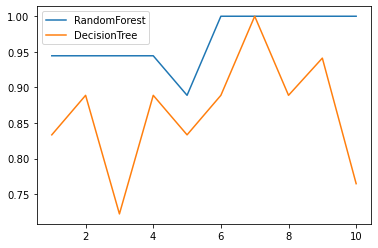

In [28]:
# 交叉验证：cross_val_score
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()
plt.show()


0.9888888888888889 37


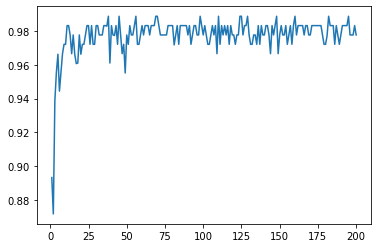

In [29]:
#n_estimators 学习曲线
score = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=4)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    score.append(rfc_s)

print(max(score),score.index(max(score)))

plt.plot(range(1,201),score)
plt.show()


In [30]:
rfc = RandomForestClassifier(n_estimators=37)
rfc_s = rfc.fit(Xtrain,Ytrain)
rfc_s.score(Xtest,Ytest)

0.9814814814814815

In [31]:
rfc_s.feature_importances_

array([0.09415458, 0.02353934, 0.0129527 , 0.02888251, 0.03413054,
       0.09775405, 0.19582233, 0.00601296, 0.0326061 , 0.13730403,
       0.06643475, 0.09696399, 0.17344212])

In [32]:
rfc.apply(Xtest)

array([[ 4, 13, 21, ...,  4,  4,  4],
       [ 8,  5, 11, ...,  1,  1,  4],
       [ 8,  5,  4, ...,  1,  1,  4],
       ...,
       [17, 22,  8, ...,  1, 15, 12],
       [17, 21, 12, ...,  7, 15, 12],
       [17, 22,  8, ...,  1,  1, 12]])

In [33]:
rfc_s.predict(Xtest)

array([2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 0, 0, 0])

In [34]:
rfc_s.predict_proba(Xtest)

array([[0.        , 0.10810811, 0.89189189],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91891892, 0.08108108],
       [0.94594595, 0.05405405, 0.        ],
       [0.10810811, 0.89189189, 0.        ],
       [0.05405405, 0.02702703, 0.91891892],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.05405405, 0.10810811, 0.83783784],
       [0.02702703, 0.97297297, 0.        ],
       [0.        , 0.08108108, 0.91891892],
       [0.08108108, 0.91891892, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.02702703, 0.54054054, 0.43243243],
       [0.56756757, 0.40540541, 0.02702703],
       [1.        , 0.        , 0.        ],
       [0.72972973, 0.27027027, 0.        ],
       [0.05405405, 0.86486486, 0.08108108],
       [0.35135135, 0.62162162, 0.02702703],
       [0.02702703, 0.08108108, 0.89189189],
       [0.